# Polynomial Regression with Lasso Regularization
This notebook demonstrates polynomial regression using a simple example of fitting a parabola to data. Lasso regularization is then applied to prevent overfitting.

## 1. Import Required Libraries
We will use libraries such as `numpy`, `matplotlib`, and `sklearn` for data generation, visualization, and modeling.

In [1]:
# Import Required Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

## 2. Generate Synthetic Data
We will generate data points that approximately follow a parabolic trend with added noise.

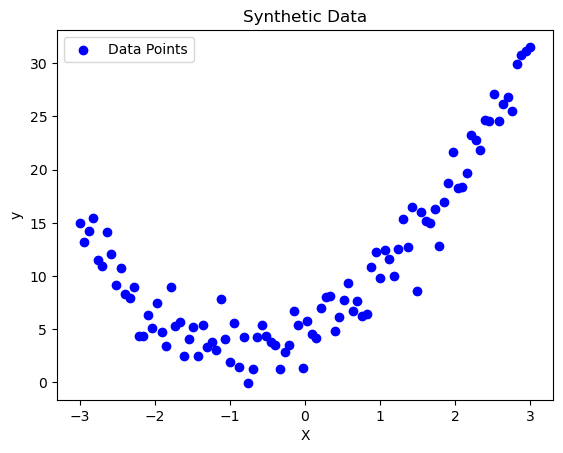

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)  # Features
y = 2 * X**2 + 3 * X + 5 + np.random.normal(0, 2, X.shape)  # Target with noise

# Visualize the data
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Synthetic Data')
plt.legend()
plt.show()

## 3. Fit a Polynomial Regression Model
We will fit a polynomial regression model to the data without regularization.

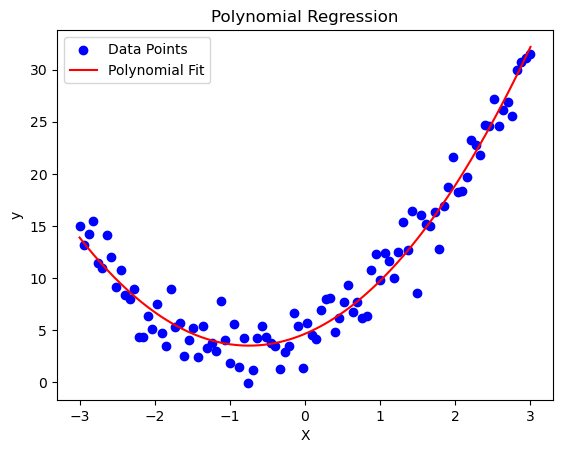

Coefficients: [[3.04597756 2.04072352]]
Intercept: [4.66766832]


In [3]:
# Fit a polynomial regression model
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
model = make_pipeline(polynomial_features, linear_regression)
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Visualize the fitted curve
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Polynomial Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

# Print model coefficients
print("Coefficients:", model.named_steps['linearregression'].coef_)
print("Intercept:", model.named_steps['linearregression'].intercept_)

## 4. Apply Lasso Regularization
We will apply Lasso regularization to the polynomial regression model to prevent overfitting.

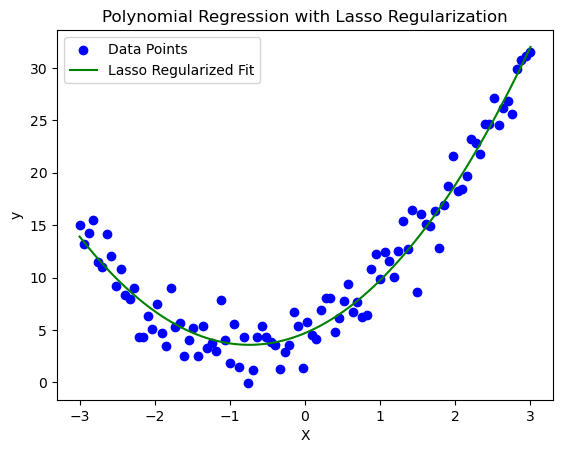

Coefficients with Lasso: [3.01330429 2.02737523]
Intercept with Lasso: [4.70852217]


In [4]:
# Fit a polynomial regression model with Lasso regularization
lasso = Lasso(alpha=0.1, max_iter=10000)
model_lasso = make_pipeline(polynomial_features, lasso)
model_lasso.fit(X, y)

# Predict values
y_pred_lasso = model_lasso.predict(X)

# Visualize the fitted curve with Lasso regularization
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred_lasso, color='green', label='Lasso Regularized Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression with Lasso Regularization')
plt.legend()
plt.show()

# Print model coefficients
print("Coefficients with Lasso:", model_lasso.named_steps['lasso'].coef_)
print("Intercept with Lasso:", model_lasso.named_steps['lasso'].intercept_)

## 5. Evaluate the Models
We will compare the performance of the models using Mean Squared Error (MSE).

In [ ]:
# Calculate Mean Squared Error for both models
mse_no_regularization = mean_squared_error(y, y_pred)
mse_with_lasso = mean_squared_error(y, y_pred_lasso)

print(f"MSE without Regularization: {mse_no_regularization}")
print(f"MSE with Lasso Regularization: {mse_with_lasso}")